In [47]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [25, 25]
plt.rcParams['figure.dpi'] = 300 # 200 e.g. is really fine, but slower

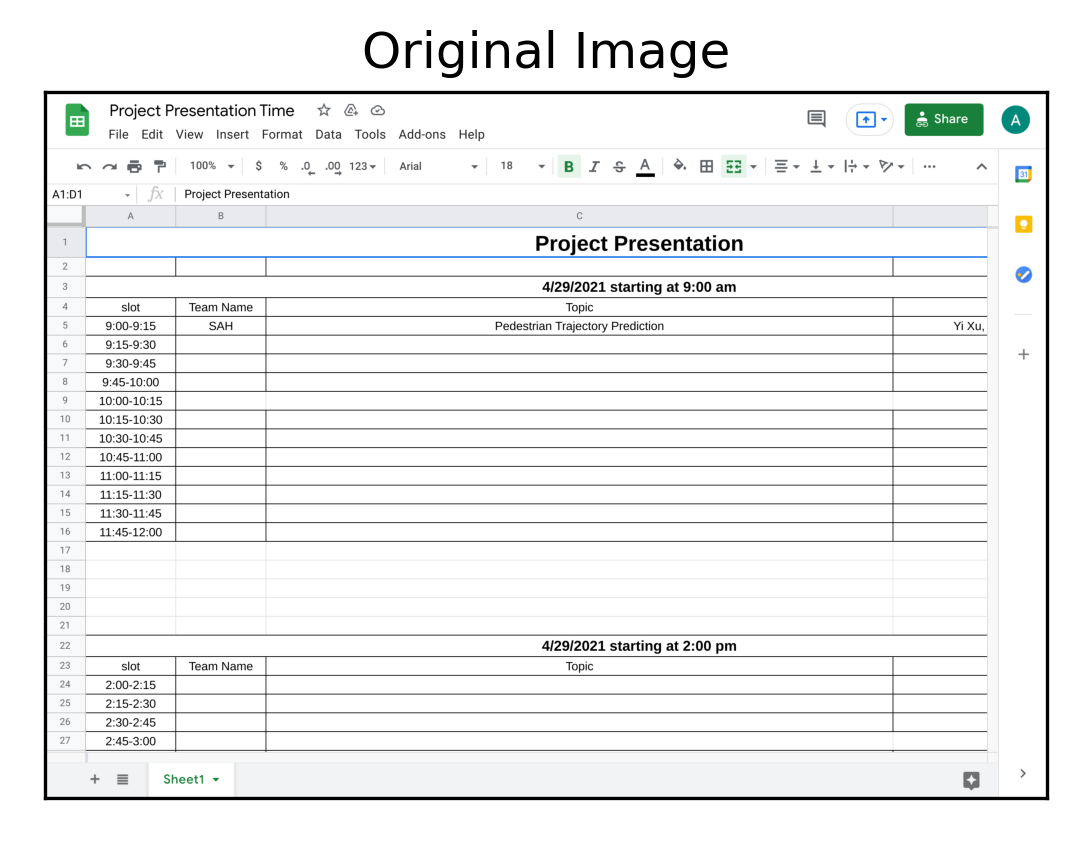

In [53]:
img = cv.imread('sheets1.png', cv.IMREAD_UNCHANGED)
img_rgb = cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)
plt.subplot(151),plt.imshow(img_rgb) 
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Res Image'), ([], []), ([], []))

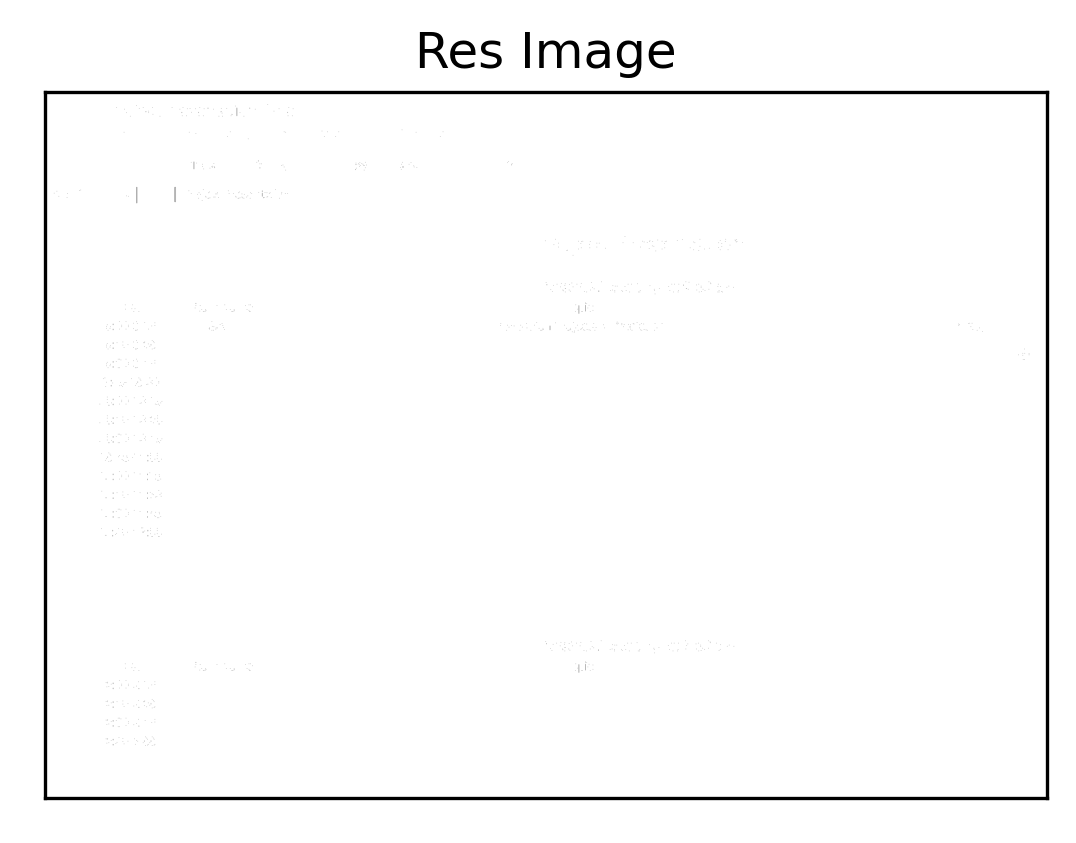

In [80]:

img_hsv = cv.cvtColor(img.copy(), cv.COLOR_BGR2HSV)

# or the hue filter of the little triangle with the top and bottom of the cell
# get the all the contours hierarchically
# find the parent cell with only 1 contour child that has the triangle thing
# check that the child is a triangle thing by running Ramer–Douglas–Peucker

# active cell index
# lower_active_cell = np.array([103,0,235])
# upper_active_cell = np.array([113,10,245])

# active cursor 
# lower_active_cell = np.array([105,220,230])
# upper_active_cell = np.array([115,255,240])

# top left arrow down
# lower_active_cell = np.array([0,0,120])
# upper_active_cell = np.array([0,0,125])

# top left box
lower_active_cell = np.array([0,0,200])
upper_active_cell = np.array([0,0,210])


mask = cv.inRange(img_hsv.copy(), lower_active_cell, upper_active_cell)
res = cv.bitwise_and(img, img, mask= mask)

plt.subplot(154),plt.imshow(res)
plt.title('Res Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

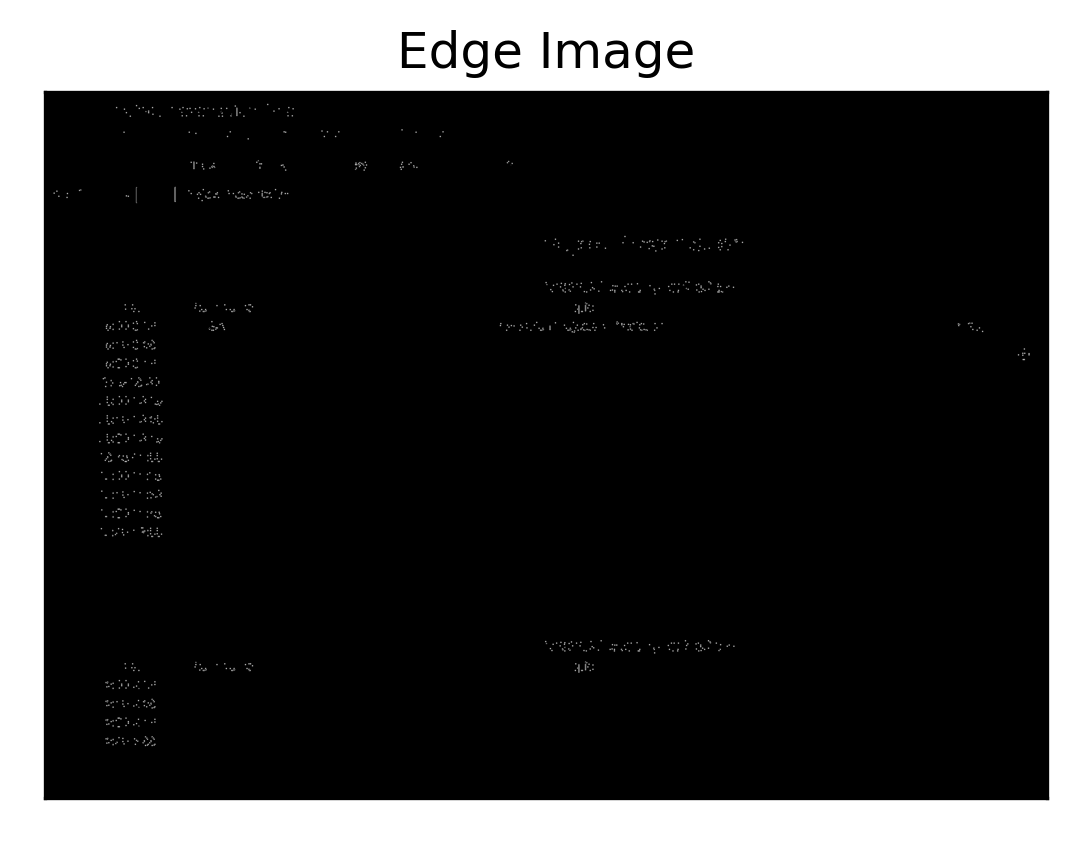

In [81]:
edges = cv.Canny(res.copy(), 50, 300)
plt.subplot(154),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Contor Image'), ([], []), ([], []))

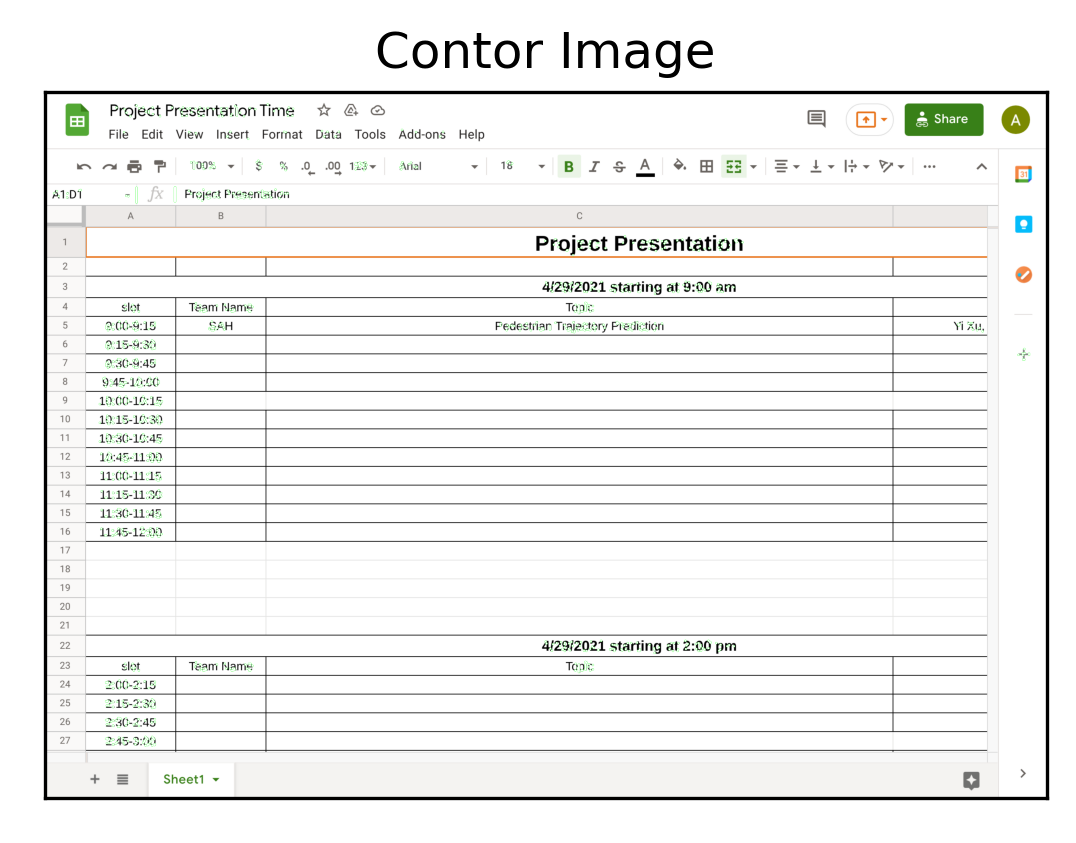

In [83]:
ret, thresh = cv.threshold(edges.copy() , 127, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
img_c = img.copy()
# for c in contours:
#     # find bounding box coordinates
#     x,y,w,h = cv.boundingRect(c)
#     cv.rectangle(img_c, (x,y), (x+w, y+h), (255, 0, 255), 5)
for c in contours:
    hull = cv.convexHull(c)
    cv.drawContours(img_c, [hull], 0, (0, 255, 0), 2)

plt.subplot(152),plt.imshow(img_c)
plt.title('Contor Image'), plt.xticks([]), plt.yticks([])

In [60]:
res.shape

(1810, 2569, 4)

In [228]:
0.87*255

221.85

In [78]:

0.80*255

204.0